# Imports and Constants

In [1]:
import json
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set()

PIDs = [
    "ngFQZ3PEO5NJ",
    "JT7ru39Irzx7",
    "a6RSZr6Rflrh",
    "SyndXrJWn1Ei",
    "HuW1wIIebZWn",
    "NvepUR3xQYb3",
    "w7TNykrDwr1q",
    "tqJLycRmlf6B",
    "CoYhbad22Jko",
    "w7TXwcLz7Ydb",
    "ruM5fRj1p3f9",
    "wQez7lrGYiza",
    "xnfPy13ddVDB",
    "2Ispy3RTXFLN",
    "MQNQXUlXMlJG",
    "yvoRfW5318GY"
]

# Data - Task Completion Times

In [2]:
meta_dfs = []
elapsed_dfs = []
elapsed2_dfs = []

for pid in PIDs:
    # get data
    with open(os.path.join("data", "participants", pid, f"session_log_{pid}.json"), "r") as f:
        d = json.load(f)

    # condition/dataset/task order
    cd1 = d["conditionOrder"][0]
    cd2 = d["conditionOrder"][1]
    ds1 = d["datasetOrder"][0]
    ds2 = d["datasetOrder"][1]
    pt1 = d["practiceTaskOrder"][0]
    pt2 = d["practiceTaskOrder"][1]

    # page records
    cns = d["consent"]
    ovr = d["overview"]
    prs = d["pre-survey"]
    tpc = d["task-practice-control"]
    lpc = d["live-practice-control"]
    tac = d["task-activity-control"]
    lac = d["live-activity-control"]
    tpa = d["task-practice-augmentation"]
    lpa = d["live-practice-augmentation"]
    taa = d["task-activity-augmentation"]
    laa = d["live-activity-augmentation"]
    pos = d["post-survey"]
    thx = d["thanks"]

    # order
    if cd1 == "control" and ds1 == "colleges":
        order = 1
    elif cd1 == "control" and ds1 == "loans":
        order = 2
    elif cd1 == "augmentation" and ds1 == "colleges":
        order = 3
    elif cd1 == "augmentation" and ds1 == "loans":
        order = 4

    # condition/dataset/task order settings
    if order == 1:
        lpct = pt1  # live practice control task = practice task 1
        lact1 = "CQ1"  # live activity control task 1 = colleges question 1
        lact2 = "CQ2"  # live activity control task 2 = colleges question 2
        lpat = pt2  # live practice augmentation task = practice task 2
        laat1 = "LQ1"  # live activity augmentation task 1 = loans question 1
        laat2 = "LQ2"  # live activity augmentation task 2 = loans question 2
    elif order == 2:
        lpct = pt1  # live practice control task = practice task 1
        lact1 = "LQ1"  # live activity control task 1 = loans question 1
        lact2 = "LQ2"  # live activity control task 2 = loans question 2
        lpat = pt2  # live practice augmentation task = practice task 2
        laat1 = "CQ1"  # live activity augmentation task 1 = colleges question 1
        laat2 = "CQ2"  # live activity augmentation task 2 = colleges question 2
    elif order == 3:
        lpct = pt2  # live practice control task = practice task 2
        lact1 = "LQ1"  # live activity control task 1 = loans question 1
        lact2 = "LQ2"  # live activity control task 2 = loans question 2
        lpat = pt1  # live practice augmentation task = practice task 1
        laat1 = "CQ1"  # live activity augmentation task 1 = colleges question 1
        laat2 = "CQ2"  # live activity augmentation task 2 = colleges question 2
    elif order == 4:
        lpct = pt2  # live practice control task = practice task 1
        lact1 = "CQ1"  # live activity control task 1 = colleges question 1
        lact2 = "CQ2"  # live activity control task 2 = colleges question 2
        lpat = pt1  # live practice augmentation task = practice task 2
        laat1 = "LQ1"  # live activity augmentation task 1 = loans question 1
        laat2 = "LQ2"  # live activity augmentation task 2 = loans question 2

    # meta
    df1 = pd.DataFrame({
        "pid": [pid],
        "conditionOrder": [f"{cd1} => {cd2}"],
        "datasetOrder": [f"{ds1} => {ds2}"],
        "practiceTaskOrder": [f"{pt1} => {pt2}"],
        "order": [order],
    })
    meta_dfs.append(df1)

    # time elapsed (minutes)
    df2 = pd.DataFrame(
        {
#             "lpc_elapsed" : lpc["record"][lpct]["elapsed"]  / 1000 / 60,
            "lac1_elapsed": lac["record"][lact1]["elapsed"] / 1000 / 60,
            "lac2_elapsed": lac["record"][lact2]["elapsed"] / 1000 / 60,
#             "lpa_elapsed" : lpa["record"][lpat]["elapsed"]  / 1000 / 60,
            "laa1_elapsed": laa["record"][laat1]["elapsed"] / 1000 / 60,
            "laa2_elapsed": laa["record"][laat2]["elapsed"] / 1000 / 60,
#             "study_elapsed": (thx["record"]["timestamp"] - cns["record"]["timestamp"]) / 1000 / 60
        },
        index=[pid]
    )
    elapsed_dfs.append(df2)
    
    # interactions data
    df3 = pd.DataFrame(
        {
            "order": [order, order, order, order],
            "interface": ["Non-Integrated", "Non-Integrated", "Integrated", "Integrated"],
            "question": [lact1, lact2, laat1, laat2],
            "minutes_elapsed": [
                lac["record"][lact1]["elapsed"] / 1000 / 60,
                lac["record"][lact2]["elapsed"] / 1000 / 60,
                laa["record"][laat1]["elapsed"] / 1000 / 60,
                laa["record"][laat2]["elapsed"] / 1000 / 60,
            ],
        },
        index=[pid, pid, pid, pid]
    )
    elapsed2_dfs.append(df3)


# collect dataframes
meta_df = pd.concat(meta_dfs)
elapsed_df = pd.concat(elapsed_dfs)
elapsed2_df = pd.concat(elapsed2_dfs)


# meta_df
# elapsed_df
elapsed2_df


# df = pd.DataFrame({
#     "cns":  [cns["record"]["elapsed"]], 
#     "ovr":  [ovr["record"]["elapsed"]], 
#     "prs":  [prs["record"]["elapsed"]], 
#     "tpc":  [tpc["record"]["elapsed"]], 
#     "lpc":  [lpc["record"][lpct]["elapsed"]], 
#     "tac":  [tac["record"]["elapsed"]], 
#     "lac1": [lac["record"][lact1]["elapsed"]], 
#     "lac2": [lac["record"][lact2]["elapsed"]], 
#     "tpa":  [tpa["record"]["elapsed"]], 
#     "lpa":  [lpa["record"][lpat]["elapsed"]], 
#     "taa":  [taa["record"]["elapsed"]], 
#     "laa1": [laa["record"][laat1]["elapsed"]], 
#     "laa2": [laa["record"][laat2]["elapsed"]], 
#     "pos":  [pos["record"]["elapsed"]], 
# })


,order,interface,question,minutes_elapsed
ngFQZ3PEO5NJ,1,Non-Integrated,CQ1,15.327050
ngFQZ3PEO5NJ,1,Non-Integrated,CQ2,19.608667
ngFQZ3PEO5NJ,1,Integrated,LQ1,13.311017
ngFQZ3PEO5NJ,1,Integrated,LQ2,14.733983
JT7ru39Irzx7,2,Non-Integrated,LQ1,26.619517
...,...,...,...,...
MQNQXUlXMlJG,3,Integrated,CQ2,4.577117
yvoRfW5318GY,4,Non-Integrated,CQ1,18.890967
yvoRfW5318GY,4,Non-Integrated,CQ2,9.365183
yvoRfW5318GY,4,Integrated,LQ1,21.271417


# Elapsed Time Stacked Bar Charts

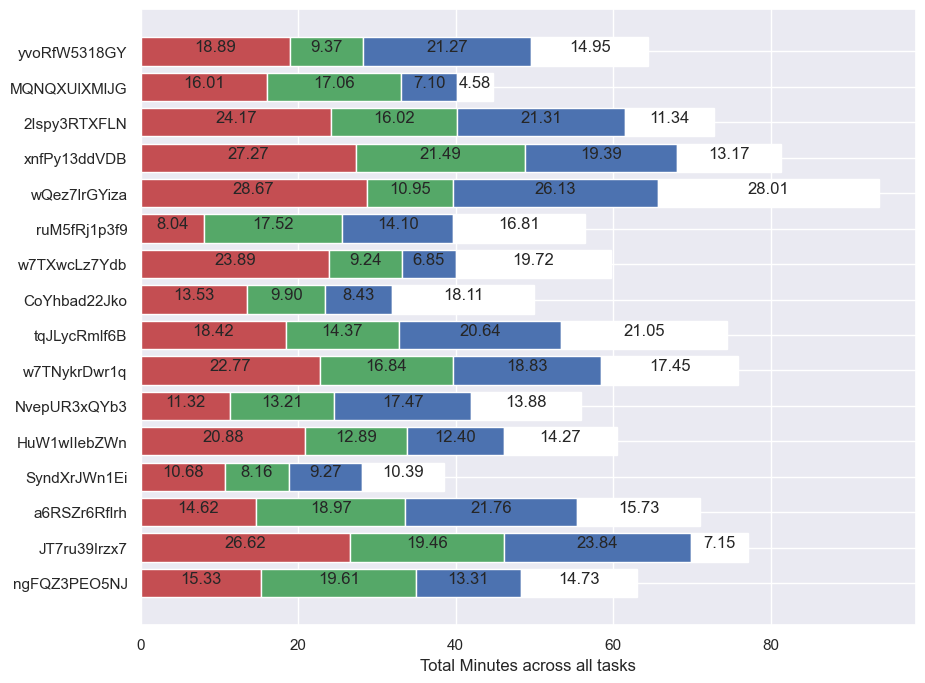

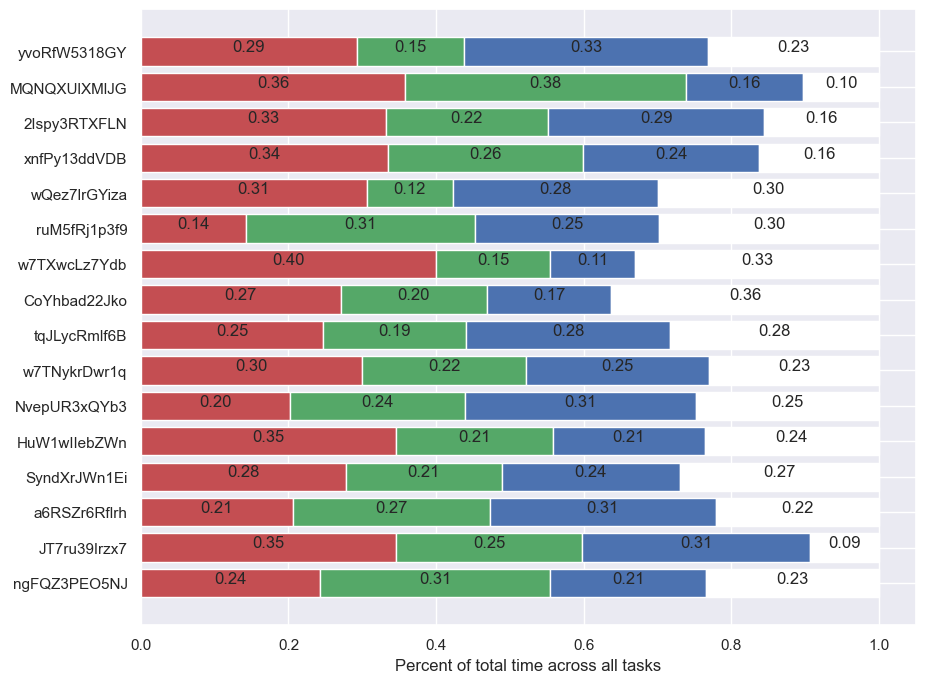

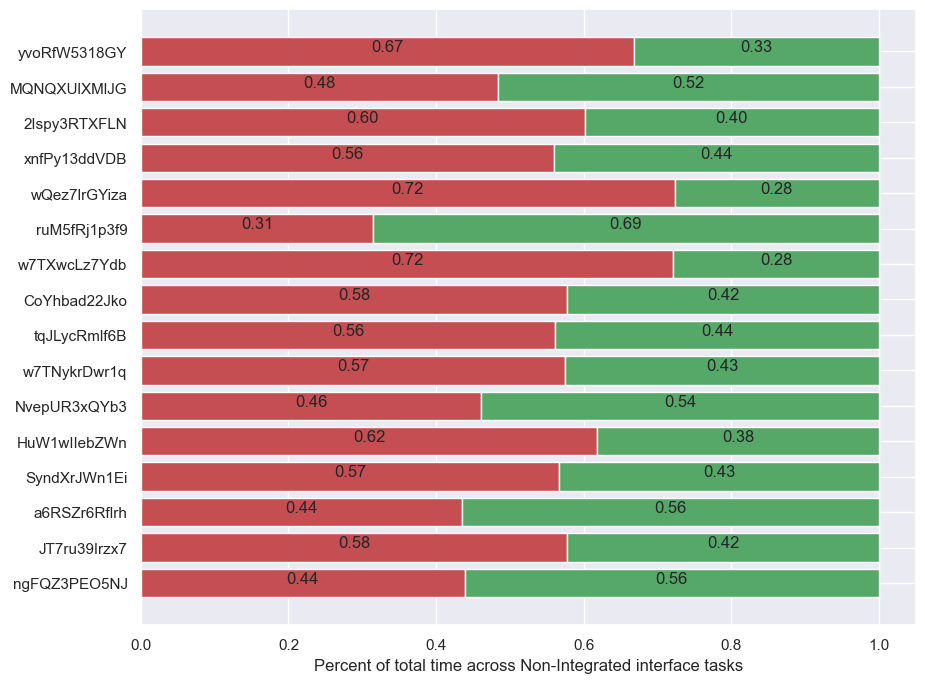

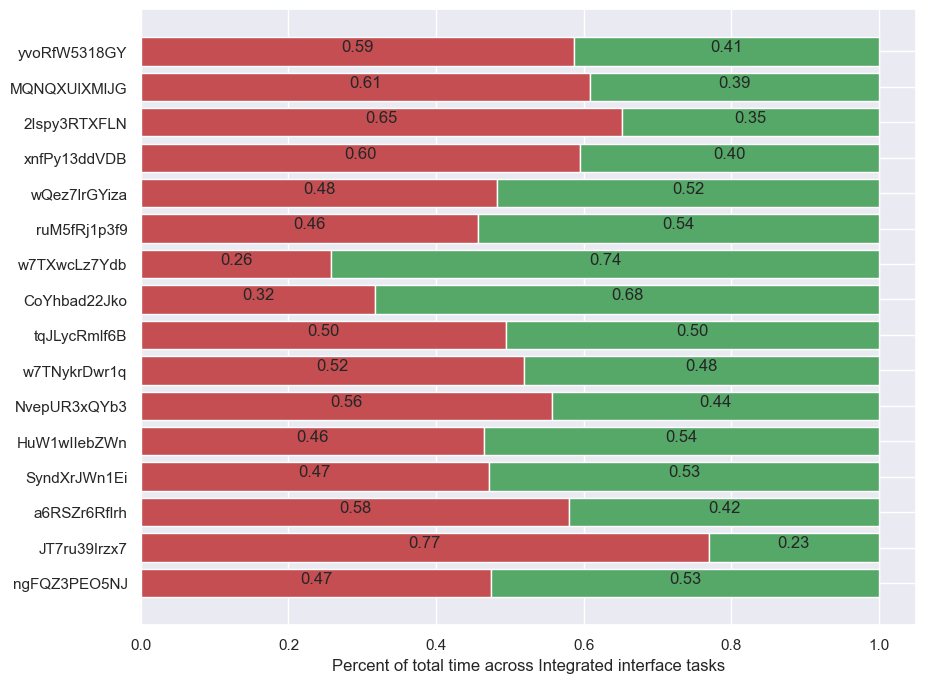

In [3]:
# plot raw elapsed time in minutes using stacked horizontal bar plots
df = elapsed_df
people = PIDs
segments = 4
data = df.T.to_numpy()
percentages = df.to_numpy()
y_pos = np.arange(len(people))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

colors ='rgbwmc'
patch_handles = []
left = np.zeros(len(people)) # left alignment of data starts at zero
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, color=colors[i%len(colors)], align='center', left=left))
    # accumulate the left-hand offsets
    left += d
    
# go through all of the bar segments and annotate
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
        ax.text(x,y, "%0.2f" % (percentages[i,j]), ha='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xlabel('Total Minutes across all tasks')

plt.show()
# plt.savefig("figures/timing/total_minutes_across_all_tasks.png")

# ================================================================== #


# plot percent elapsed time using stacked horizontal bar plots
df = elapsed_df.div(elapsed_df.sum(axis=1), axis=0)
people = PIDs
segments = 4
data = df.T.to_numpy()
percentages = df.to_numpy()
y_pos = np.arange(len(people))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

colors ='rgbwmc'
patch_handles = []
left = np.zeros(len(people)) # left alignment of data starts at zero
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, color=colors[i%len(colors)], align='center', left=left))
    # accumulate the left-hand offsets
    left += d
    
# go through all of the bar segments and annotate
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
        ax.text(x,y, "%0.2f" % (percentages[i,j]), ha='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xlabel('Percent of total time across all tasks')

plt.show()
# plt.savefig("figures/timing/percent_of_total_time_across_all_tasks.png")

# ================================================================== #


# plot percent elapsed time with Non-Integrated interface using stacked horizontal bar plots
elapsed_lac_df = elapsed_df[["lac1_elapsed", "lac2_elapsed"]]
df = elapsed_lac_df.div(elapsed_lac_df.sum(axis=1), axis=0)
people = PIDs
segments = 4
data = df.T.to_numpy()
percentages = df.to_numpy()
y_pos = np.arange(len(people))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

colors ='rgbwmc'
patch_handles = []
left = np.zeros(len(people)) # left alignment of data starts at zero
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, color=colors[i%len(colors)], align='center', left=left))
    # accumulate the left-hand offsets
    left += d
    
# go through all of the bar segments and annotate
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
        ax.text(x,y, "%0.2f" % (percentages[i,j]), ha='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xlabel('Percent of total time across Non-Integrated interface tasks')

plt.show()
# plt.savefig("figures/timing/percent_of_total_time_across_Non-Integrated_interface_tasks.png")

# ================================================================== #


# plot percent elapsed time with integrated interface using stacked horizontal bar plots
elapsed_lac_df = elapsed_df[["laa1_elapsed", "laa2_elapsed"]]
df = elapsed_lac_df.div(elapsed_lac_df.sum(axis=1), axis=0)
people = PIDs
segments = 4
data = df.T.to_numpy()
percentages = df.to_numpy()
y_pos = np.arange(len(people))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

colors ='rgbwmc'
patch_handles = []
left = np.zeros(len(people)) # left alignment of data starts at zero
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, color=colors[i%len(colors)], align='center', left=left))
    # accumulate the left-hand offsets
    left += d
    
# go through all of the bar segments and annotate
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
        ax.text(x,y, "%0.2f" % (percentages[i,j]), ha='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xlabel('Percent of total time across Integrated interface tasks')

plt.show()
# plt.savefig("figures/timing/percent_of_total_time_across_Integrated_interface_tasks.png")

# Task Completion Time By Question

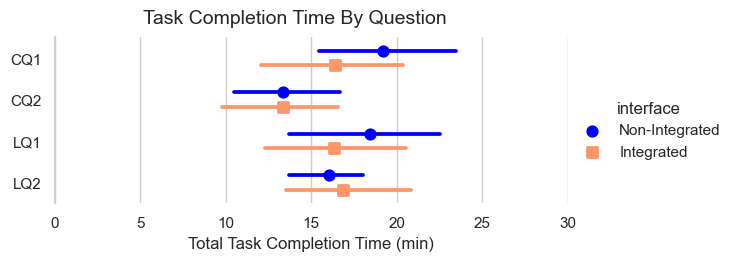

,question,interface,mean,lower_bound,uppper_bound
0,CQ1,Integrated,16.406169,12.086137,20.364951
1,CQ1,Non-Integrated,19.208348,15.435297,23.489151
2,CQ2,Integrated,13.331344,9.781548,16.579860
3,CQ2,Non-Integrated,13.342615,10.463320,16.663715
4,LQ1,Integrated,16.354962,12.280912,20.552872
5,LQ1,Non-Integrated,18.429367,13.713115,22.524260
6,LQ2,Integrated,16.834879,13.526293,20.833577
7,LQ2,Non-Integrated,16.039873,13.700869,18.012195


In [8]:
# Create plot
g = sns.catplot(
    x="minutes_elapsed", 
    y="question",
    hue="interface", 
    data=elapsed2_df,
    errorbar=('ci', 95), 
    n_boot=1000,
    kind="point", 
    height=2.5,
    aspect=2.5,
    orient="h",
    palette=["#0000F4", "#FF9669"],
    markers=["o", "s"],
    dodge=0.35,
    join=False
)

# Edit plot
# g.set(xlabel=None, ylabel=None)
# fig = g.fig
# fig.patch.set_alpha(1.0)
# fig.suptitle(
#     'Task Completion Time By Question', 
#     fontsize=14,
#     x=0.44,
#     y=1.04,
# )
# plt.xlim(0, 25)

# Edit plot
g.set(xlabel="Total Task Completion Time (min)", ylabel=None)

ax = g.ax
ax.xaxis.set_major_locator(ticker.MultipleLocator(5)) # show tick every 5 step

fig = g.fig
fig.patch.set_alpha(1.0)
fig.suptitle(
    'Task Completion Time By Question', 
    fontsize=14,
    x=0.44,
    y=1.04,
)

sns.despine(fig=fig, ax=ax, top=True, right=True, left=False, bottom=True)

plt.xlim(0, 30)

# Save plot
plt.show()
# fig.savefig("figures/timing/task_completion_time.png", bbox_inches='tight', dpi=300)

# Get plotted values
mean_df = elapsed2_df.groupby(["question", "interface"])["minutes_elapsed"].mean().rename("mean")
cis = [l.get_xdata() for l in g.ax.lines]
ci_lbs_df = pd.Series(
    [cis[4][0], cis[0][0], 
     cis[5][0], cis[1][0], 
     cis[6][0], cis[2][0], 
     cis[7][0], cis[3][0]],
    name="lower_bound",
    index=mean_df.index
)
ci_ubs_df = pd.Series(
    [cis[4][1], cis[0][1], 
     cis[5][1], cis[1][1], 
     cis[6][1], cis[2][1], 
     cis[7][1], cis[3][1]],
    name="uppper_bound",
    index=mean_df.index
)
tasktimes_df = pd.concat([
    mean_df,
    ci_lbs_df,
    ci_ubs_df
], axis=1).reset_index()

tasktimes_df

# Data - Time Spent Integrating

In [5]:
data = np.array([
    # P01
    ["yvoRfW5318GY", 4, "Non-Integrated", "CQ1", 0.81, 2],
    ["yvoRfW5318GY", 4, "Non-Integrated", "CQ2", 0.44, 2],
    ["yvoRfW5318GY", 4, "Integrated", "LQ1", 0.18, 3],
    ["yvoRfW5318GY", 4, "Integrated", "LQ2", 0.31, 1],
    # P02
    ["wQez7lrGYiza", 4, "Non-Integrated", "CQ1", 0.56, 2],
    ["wQez7lrGYiza", 4, "Non-Integrated", "CQ2", 0.62, 1],
    ["wQez7lrGYiza", 4, "Integrated", "LQ1", 0.21, 2],
    ["wQez7lrGYiza", 4, "Integrated", "LQ2", 0.07, 2],
    # P03
    ["tqJLycRmlf6B", 4, "Non-Integrated", "CQ1", 0.42, 2],
    ["tqJLycRmlf6B", 4, "Non-Integrated", "CQ2", 0.53, 2],
    ["tqJLycRmlf6B", 4, "Integrated", "LQ1", 0.14, 3],
    ["tqJLycRmlf6B", 4, "Integrated", "LQ2", 0.12, 6],
    # P04
    ["SyndXrJWn1Ei", 4, "Non-Integrated", "CQ1", 0.60, 1],
    ["SyndXrJWn1Ei", 4, "Non-Integrated", "CQ2", 0.34, 1],
    ["SyndXrJWn1Ei", 4, "Integrated", "LQ1", 0.00, 0],
    ["SyndXrJWn1Ei", 4, "Integrated", "LQ2", 0.00, 0],
    # P05
    ["xnfPy13ddVDB", 1, "Non-Integrated", "CQ1", 0.65, 1],
    ["xnfPy13ddVDB", 1, "Non-Integrated", "CQ2", 0.32, 1],
    ["xnfPy13ddVDB", 1, "Integrated", "LQ1", 0.19, 3],
    ["xnfPy13ddVDB", 1, "Integrated", "LQ2", 0.27, 5],
    # P06
    ["CoYhbad22Jko", 1, "Non-Integrated", "CQ1", 0.42, 2],
    ["CoYhbad22Jko", 1, "Non-Integrated", "CQ2", 0.58, 3],
    ["CoYhbad22Jko", 1, "Integrated", "LQ1", 0.28, 2],
    ["CoYhbad22Jko", 1, "Integrated", "LQ2", 0.26, 6],
    # P07
    ["HuW1wIIebZWn", 1, "Non-Integrated", "CQ1", 0.59, 1],
    ["HuW1wIIebZWn", 1, "Non-Integrated", "CQ2", 0.57, 1],
    ["HuW1wIIebZWn", 1, "Integrated", "LQ1", 0.07, 1],
    ["HuW1wIIebZWn", 1, "Integrated", "LQ2", 0.26, 1],
    # P08
    ["ngFQZ3PEO5NJ", 1, "Non-Integrated", "CQ1", 0.52, 1],
    ["ngFQZ3PEO5NJ", 1, "Non-Integrated", "CQ2", 0.38, 1],
    ["ngFQZ3PEO5NJ", 1, "Integrated", "LQ1", 0.32, 1],
    ["ngFQZ3PEO5NJ", 1, "Integrated", "LQ2", 0.00, 0],
    # P09
    ["MQNQXUlXMlJG", 3, "Integrated", "CQ1", 0.16, 1],
    ["MQNQXUlXMlJG", 3, "Integrated", "CQ2", 0.55, 2],
    ["MQNQXUlXMlJG", 3, "Non-Integrated", "LQ1", 0.33, 1],
    ["MQNQXUlXMlJG", 3, "Non-Integrated", "LQ2", 0.19, 1],
    # P10
    ["ruM5fRj1p3f9", 3, "Integrated", "CQ1", 0.20, 2],
    ["ruM5fRj1p3f9", 3, "Integrated", "CQ2", 0.28, 2],
    ["ruM5fRj1p3f9", 3, "Non-Integrated", "LQ1", 0.24, 1],
    ["ruM5fRj1p3f9", 3, "Non-Integrated", "LQ2", 0.19, 1],
    # P11
    ["w7TNykrDwr1q", 3, "Integrated", "CQ1", 0.04, 2],
    ["w7TNykrDwr1q", 3, "Integrated", "CQ2", 0.17, 1],
    ["w7TNykrDwr1q", 3, "Non-Integrated", "LQ1", 0.14, 2],
    ["w7TNykrDwr1q", 3, "Non-Integrated", "LQ2", 0.41, 2],
    # P12
    ["a6RSZr6Rflrh", 3, "Integrated", "CQ1", 0.16, 1],
    ["a6RSZr6Rflrh", 3, "Integrated", "CQ2", 0.15, 2],
    ["a6RSZr6Rflrh", 3, "Non-Integrated", "LQ1", 0.31, 1],
    ["a6RSZr6Rflrh", 3, "Non-Integrated", "LQ2", 0.36, 1],
    # P13
    ["2Ispy3RTXFLN", 2, "Integrated", "CQ1", 0.13, 2],
    ["2Ispy3RTXFLN", 2, "Integrated", "CQ2", 0.38, 2],
    ["2Ispy3RTXFLN", 2, "Non-Integrated", "LQ1", 0.26, 3],
    ["2Ispy3RTXFLN", 2, "Non-Integrated", "LQ2", 0.35, 1],
    # P14
    ["w7TXwcLz7Ydb", 2, "Integrated", "CQ1", 0.00, 0],
    ["w7TXwcLz7Ydb", 2, "Integrated", "CQ2", 0.00, 0],
    ["w7TXwcLz7Ydb", 2, "Non-Integrated", "LQ1", 0.44, 2],
    ["w7TXwcLz7Ydb", 2, "Non-Integrated", "LQ2", 0.37, 1],
    # P15
    ["NvepUR3xQYb3", 2, "Integrated", "CQ1", 0.15, 2],
    ["NvepUR3xQYb3", 2, "Integrated", "CQ2", 0.14, 1],
    ["NvepUR3xQYb3", 2, "Non-Integrated", "LQ1", 0.32, 1],
    ["NvepUR3xQYb3", 2, "Non-Integrated", "LQ2", 0.27, 1],
    # P16
    ["JT7ru39Irzx7", 2, "Integrated", "CQ1", 0.18, 2],
    ["JT7ru39Irzx7", 2, "Integrated", "CQ2", 0.00, 0],
    ["JT7ru39Irzx7", 2, "Non-Integrated", "LQ1", 0.50, 1],
    ["JT7ru39Irzx7", 2, "Non-Integrated", "LQ2", 0.34, 2],
])

time_spent_df = pd.DataFrame(
    data=data[0:,1:], # every row, every column except for the first
    index=data[0:,0], # every row, only the first column
    columns=[
        "order", 
        "interface",
        "question",
        "percent_time_spent_integrating",
        "number_intervals_integrating",
    ]
).astype({
    "order": "int64", 
    "interface": "object",
    "question": "object",
    "percent_time_spent_integrating": "float64",
    "number_intervals_integrating": "int64",
})

time_spent_df

,order,interface,question,percent_time_spent_integrating,number_intervals_integrating
yvoRfW5318GY,4,Non-Integrated,CQ1,0.81,2
yvoRfW5318GY,4,Non-Integrated,CQ2,0.44,2
yvoRfW5318GY,4,Integrated,LQ1,0.18,3
yvoRfW5318GY,4,Integrated,LQ2,0.31,1
wQez7lrGYiza,4,Non-Integrated,CQ1,0.56,2
...,...,...,...,...,...
NvepUR3xQYb3,2,Non-Integrated,LQ2,0.27,1
JT7ru39Irzx7,2,Integrated,CQ1,0.18,2
JT7ru39Irzx7,2,Integrated,CQ2,0.00,0
JT7ru39Irzx7,2,Non-Integrated,LQ1,0.50,1


# Time Spent Integrating - Percent Time Spent CIs

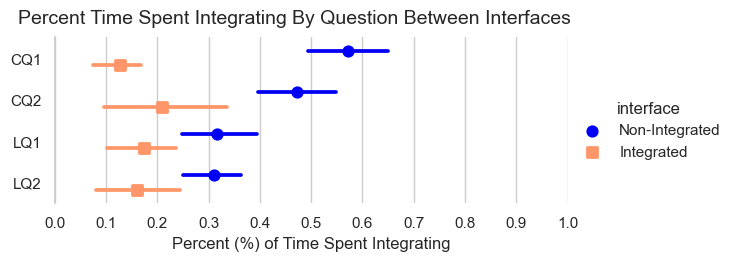

,question,interface,mean,lower_bound,uppper_bound
0,CQ1,Integrated,0.12750,0.075000,0.168750
1,CQ1,Non-Integrated,0.57125,0.493656,0.650031
2,CQ2,Integrated,0.20875,0.096250,0.336281
3,CQ2,Non-Integrated,0.47250,0.396250,0.547500
4,LQ1,Integrated,0.17375,0.102469,0.236250
5,LQ1,Non-Integrated,0.31750,0.248750,0.393781
6,LQ2,Integrated,0.16125,0.080000,0.243750
7,LQ2,Non-Integrated,0.31000,0.251250,0.363750


In [6]:
# Set style
sns.set_style("whitegrid")

# Create plot
g = sns.catplot(
    x="percent_time_spent_integrating", 
    y="question",
    hue="interface", 
    data=time_spent_df,
    errorbar=('ci', 95),  
    n_boot=1000,
    kind="point", 
    height=2.5,
    aspect=2.5,
    orient="h",
    palette=["#0000F4", "#FF9669"],
    markers=["o", "s"],
    dodge=0.35,
    join=False
)

# Edit plot
g.set(xlabel="Percent (%) of Time Spent Integrating", ylabel=None)

ax = g.ax
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1)) # show tick every 0.1 step

fig = g.fig
fig.patch.set_alpha(1.0)
fig.suptitle(
    'Percent Time Spent Integrating By Question Between Interfaces', 
    fontsize=14,
    x=0.44,
    y=1.04,
)

sns.despine(fig=fig, ax=ax, top=True, right=True, left=False, bottom=True)

plt.xlim(0, 1)

# Save plot
plt.show()
# fig.savefig("figures/timing/percent_time_spent_integrating_CIs.png", bbox_inches='tight', dpi=300)

# Get plotted values
mean_df = time_spent_df.groupby(["question", "interface"])["percent_time_spent_integrating"].mean().rename("mean")
cis = [l.get_xdata() for l in g.ax.lines]
ci_lbs_df = pd.Series(
    [cis[4][0], cis[0][0], 
     cis[5][0], cis[1][0], 
     cis[6][0], cis[2][0], 
     cis[7][0], cis[3][0]],
    name="lower_bound",
    index=mean_df.index
)
ci_ubs_df = pd.Series(
    [cis[4][1], cis[0][1], 
     cis[5][1], cis[1][1], 
     cis[6][1], cis[2][1], 
     cis[7][1], cis[3][1]],
    name="uppper_bound",
    index=mean_df.index
)
tasktimes_df = pd.concat([
    mean_df,
    ci_lbs_df,
    ci_ubs_df
], axis=1).reset_index()

tasktimes_df

# Time Spent Integrating - Number of Intervals CIs

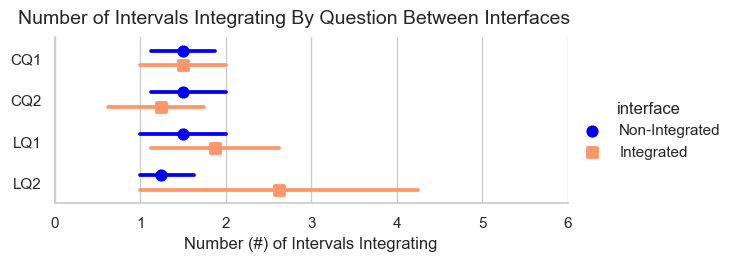

,question,interface,mean,lower_bound,uppper_bound
0,CQ1,Integrated,1.500,1.000,2.000000
1,CQ1,Non-Integrated,1.500,1.125,1.875000
2,CQ2,Integrated,1.250,0.625,1.750000
3,CQ2,Non-Integrated,1.500,1.125,2.000000
4,LQ1,Integrated,1.875,1.125,2.625000
5,LQ1,Non-Integrated,1.500,1.000,2.000000
6,LQ2,Integrated,2.625,1.000,4.253125
7,LQ2,Non-Integrated,1.250,1.000,1.625000


In [7]:
# Set style
sns.set_style("whitegrid")

# Create plot
g = sns.catplot(
    x="number_intervals_integrating", 
    y="question",
    hue="interface", 
    data=time_spent_df,
    errorbar=('ci', 95), 
    n_boot=1000,
    kind="point", 
    height=2.5,
    aspect=2.5,
    orient="h",
    palette=["#0000F4", "#FF9669"],
    markers=["o", "s"],
    dodge=0.35,
    join=False
)

# Edit plot
g.set(xlabel="Number (#) of Intervals Integrating", ylabel=None)
fig = g.fig
fig.patch.set_alpha(1.0)
fig.suptitle(
    'Number of Intervals Integrating By Question Between Interfaces', 
    fontsize=14,
    x=0.44,
    y=1.04,
)
plt.xlim(0, 6)

# Save plot
plt.show()
# fig.savefig("figures/timing/number_intervals_integrating_CIs.png", bbox_inches='tight', dpi=300)

# Get plotted values
mean_df = time_spent_df.groupby(["question", "interface"])["number_intervals_integrating"].mean().rename("mean")
cis = [l.get_xdata() for l in g.ax.lines]
ci_lbs_df = pd.Series(
    [cis[4][0], cis[0][0], 
     cis[5][0], cis[1][0], 
     cis[6][0], cis[2][0], 
     cis[7][0], cis[3][0]],
    name="lower_bound",
    index=mean_df.index
)
ci_ubs_df = pd.Series(
    [cis[4][1], cis[0][1], 
     cis[5][1], cis[1][1], 
     cis[6][1], cis[2][1], 
     cis[7][1], cis[3][1]],
    name="uppper_bound",
    index=mean_df.index
)
tasktimes_df = pd.concat([
    mean_df,
    ci_lbs_df,
    ci_ubs_df
], axis=1).reset_index()

tasktimes_df